In [ ]:
import pandas as pd

#顯示所有欄位
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 讀取 Excel 檔案
excel_file = '議題資料.xlsx'
excel_data = pd.ExcelFile (excel_file)

# 取得所有工作表名稱
sheet_names = excel_data.sheet_names

# 逐一讀取並存為 CSV，並讀取 CSV 檔案
for sheet_name in sheet_names:
    df = excel_data.parse(sheet_name)
    df.to_csv(f'{sheet_name}.csv', index=False)

# 轉換資料型態，但出現,無法轉換
# numeric_columns = ['Engagement Score', 'Reaction All', 'Like', 'Love', 'HaHa', 
#                   'Wow', 'Sad', 'Angry', 'Shares', 'Comments']
                  
# for col in numeric_columns:
#     df_clean[col] = pd.to_numeric(df_clean[col])
# count_data = df_clean.groupby('Date').size()

# plt.figure(figsize=(10, 5))
# count_data.plot(kind='bar', color='skyblue')
# plt.title('Post Volume Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Posts')


In [3]:
import pandas as pd
# 資料型態初步處理    
def time_sort(file):   
    data = pd.read_csv(file,thousands = (','))
    data['Time'] = pd.to_datetime(data['Time'])
    data = data.sort_values(by = 'Time',ascending = True)
    data['Date'] = data['Time'].dt.date 
    return data

file1,file2,file3 = '兒福聯盟議題.csv','社工議題資料集.csv','整體議題資料集.csv'

data1 = time_sort(file1)
data2 = time_sort(file2)
data3 = time_sort(file3)

data4 = pd.concat([data1,data2,data3],axis = 0)
data4.reset_index(inplace = True)
print(data4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             300 non-null    int64         
 1   Time              300 non-null    datetime64[ns]
 2   Keyword           300 non-null    object        
 3   Facebook Page     300 non-null    object        
 4   Page ID           300 non-null    float64       
 5   Fan Count         300 non-null    int64         
 6   Post Type         137 non-null    object        
 7   Content           300 non-null    object        
 8   Engagement Score  300 non-null    int64         
 9   Reaction All      300 non-null    int64         
 10  Like              300 non-null    int64         
 11  Love              300 non-null    int64         
 12  HaHa              300 non-null    int64         
 13  Wow               300 non-null    int64         
 14  Sad               300 non-

In [134]:
# 檢查Content是否包含任何關鍵字
def is_relevant(text):
    if isinstance(text, str):
        return any(keyword in text for keyword in relevant_keywords)
    
    return False

In [137]:
import pandas as pd

data = pd.read_csv('合併資料.csv')
# 去除重複及不要的欄位
df = data.drop_duplicates(subset=['Content'], keep='first')
# print(df.info())

df2 = df.drop(['index','Time','Page ID','Post Type','URL'],axis = 1)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 291
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Keyword           201 non-null    object
 1   Facebook Page     201 non-null    object
 2   Fan Count         201 non-null    int64 
 3   Content           201 non-null    object
 4   Engagement Score  201 non-null    int64 
 5   Reaction All      201 non-null    int64 
 6   Like              201 non-null    int64 
 7   Love              201 non-null    int64 
 8   HaHa              201 non-null    int64 
 9   Wow               201 non-null    int64 
 10  Sad               201 non-null    int64 
 11  Angry             201 non-null    int64 
 12  Shares            201 non-null    int64 
 13  Comments          201 non-null    int64 
 14  Date              201 non-null    object
dtypes: int64(11), object(4)
memory usage: 25.1+ KB
None


In [138]:
# 轉換日期資料型態
df2 = df2.drop(['Keyword'], axis = 1)
df2['Date'] = pd.to_datetime(df2['Date'])
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 291
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Facebook Page     201 non-null    object        
 1   Fan Count         201 non-null    int64         
 2   Content           201 non-null    object        
 3   Engagement Score  201 non-null    int64         
 4   Reaction All      201 non-null    int64         
 5   Like              201 non-null    int64         
 6   Love              201 non-null    int64         
 7   HaHa              201 non-null    int64         
 8   Wow               201 non-null    int64         
 9   Sad               201 non-null    int64         
 10  Angry             201 non-null    int64         
 11  Shares            201 non-null    int64         
 12  Comments          201 non-null    int64         
 13  Date              201 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(11)

(array([19785., 19787., 19789., 19791., 19793., 19795., 19797., 19799.]),
 [Text(19785.0, 0, '2024-03-03'),
  Text(19787.0, 0, '2024-03-05'),
  Text(19789.0, 0, '2024-03-07'),
  Text(19791.0, 0, '2024-03-09'),
  Text(19793.0, 0, '2024-03-11'),
  Text(19795.0, 0, '2024-03-13'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19799.0, 0, '2024-03-17')])

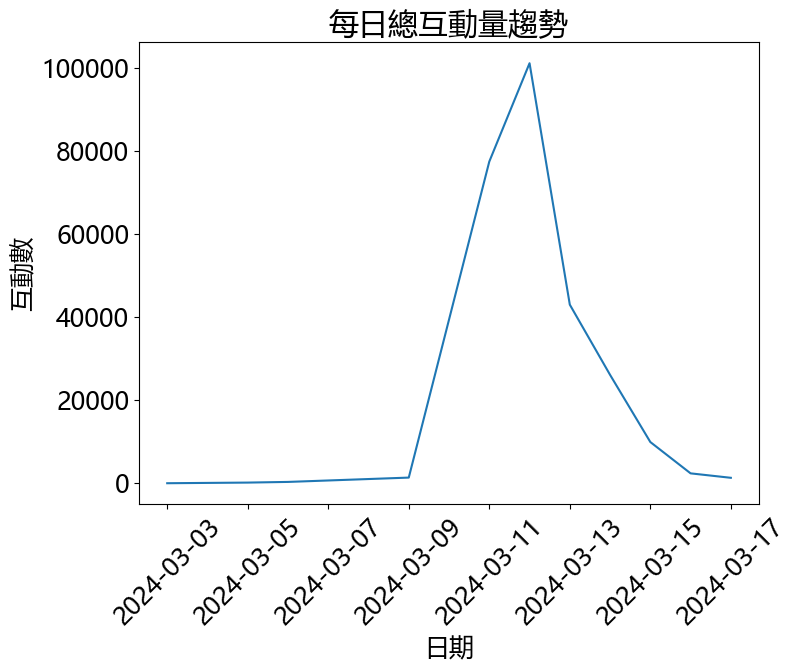

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Microsoft YaHei"
plt.rcParams["font.size"] = 18

daily_interaction = df2.groupby('Date').agg({
    'Engagement Score': 'sum',
    'Comments': 'sum',
    'Shares': 'sum'
}).reset_index()
# 互動量 = 評論數加分享數
daily_interaction['interaction'] = daily_interaction['Comments'] + daily_interaction['Shares']

plt.figure(figsize=(8, 6))
plt.plot(daily_interaction['Date'], daily_interaction['interaction'])
plt.title('每日總互動量趨勢')
plt.xlabel('日期')
plt.ylabel('互動數')
plt.xticks(rotation=45)

In [140]:
 # 設定只想保留資料日期範圍
start_date = '2024-03-11'
end_date = '2024-03-13'
    
# 篩選指定日期範圍的資料
mask = (df2['Date'] >= start_date) & (df2['Date'] <= end_date)
filtered_df = df2[mask]
filtered_df.reset_index(inplace = True)
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             151 non-null    int64         
 1   Facebook Page     151 non-null    object        
 2   Fan Count         151 non-null    int64         
 3   Content           151 non-null    object        
 4   Engagement Score  151 non-null    int64         
 5   Reaction All      151 non-null    int64         
 6   Like              151 non-null    int64         
 7   Love              151 non-null    int64         
 8   HaHa              151 non-null    int64         
 9   Wow               151 non-null    int64         
 10  Sad               151 non-null    int64         
 11  Angry             151 non-null    int64         
 12  Shares            151 non-null    int64         
 13  Comments          151 non-null    int64         
 14  Date              151 non-

In [142]:
filtered_df.to_excel('三天間的資料.xlsx', sheet_name = '工作表１',index = False)

In [118]:
# 訪視相關、管理、監督等關鍵字
lst_view = ["訪視","視察","訪查","查看","沒有探視","頭髮禿","外傷","撞到","瘀青","家屬探視","拒絕","不方便"]
lst_man = ["督導","家屬爆料","第一時間","改善","失職","人力","制度","機制","檢討","負責","工作量"]
lst_sup = ["哭聲","通報","菲傭","外傭","檢舉","投訴","舉報","協調"]


In [143]:
# 議題分類
lst_view = ["訪視","視察","訪查","查看","沒有探視","頭髮禿","外傷","撞到","瘀青","家屬探視","拒絕","不方便"]
relevant_keywords = lst_view
data_view = filtered_df[filtered_df['Content'].apply(is_relevant)]
data_view['Issue'] = '訪視'
print(data_view.info())


<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 147
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             43 non-null     int64         
 1   Facebook Page     43 non-null     object        
 2   Fan Count         43 non-null     int64         
 3   Content           43 non-null     object        
 4   Engagement Score  43 non-null     int64         
 5   Reaction All      43 non-null     int64         
 6   Like              43 non-null     int64         
 7   Love              43 non-null     int64         
 8   HaHa              43 non-null     int64         
 9   Wow               43 non-null     int64         
 10  Sad               43 non-null     int64         
 11  Angry             43 non-null     int64         
 12  Shares            43 non-null     int64         
 13  Comments          43 non-null     int64         
 14  Date              43 non-null   

C:\Users\t1275\AppData\Local\Temp\ipykernel_15608\962626510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_view['Issue'] = '訪視'


In [144]:
relevant_keywords = lst_man
data_man = filtered_df[filtered_df['Content'].apply(is_relevant)]
data_man['Issue'] = '管理'
print(data_man.info())
# data_view.to_csv('訪視議題貼文.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 3 to 149
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             60 non-null     int64         
 1   Facebook Page     60 non-null     object        
 2   Fan Count         60 non-null     int64         
 3   Content           60 non-null     object        
 4   Engagement Score  60 non-null     int64         
 5   Reaction All      60 non-null     int64         
 6   Like              60 non-null     int64         
 7   Love              60 non-null     int64         
 8   HaHa              60 non-null     int64         
 9   Wow               60 non-null     int64         
 10  Sad               60 non-null     int64         
 11  Angry             60 non-null     int64         
 12  Shares            60 non-null     int64         
 13  Comments          60 non-null     int64         
 14  Date              60 non-null   

C:\Users\t1275\AppData\Local\Temp\ipykernel_15608\1788515203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_man['Issue'] = '管理'


In [145]:
relevant_keywords = lst_sup
data_sup = filtered_df[filtered_df['Content'].apply(is_relevant)]
data_sup['Issue'] = '監督'
print(data_sup.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 14 to 149
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             18 non-null     int64         
 1   Facebook Page     18 non-null     object        
 2   Fan Count         18 non-null     int64         
 3   Content           18 non-null     object        
 4   Engagement Score  18 non-null     int64         
 5   Reaction All      18 non-null     int64         
 6   Like              18 non-null     int64         
 7   Love              18 non-null     int64         
 8   HaHa              18 non-null     int64         
 9   Wow               18 non-null     int64         
 10  Sad               18 non-null     int64         
 11  Angry             18 non-null     int64         
 12  Shares            18 non-null     int64         
 13  Comments          18 non-null     int64         
 14  Date              18 non-null  

C:\Users\t1275\AppData\Local\Temp\ipykernel_15608\1616342954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sup['Issue'] = '監督'


In [57]:
def calculate_stats_df(df):
    # 計算統計數據
    stats = {
        '影響力分數': [round(df['Engagement Score'].mean(), 0)],
        '發文數' : [len(df)],
        '互動數': [df['Comments'].sum() + df['Shares'].sum()],
        '平均按讚數': [round(df['Like'].mean(),0)]
    }
    
    # 創建DataFrame
    stats_df = pd.DataFrame(stats)
    
    return stats_df

In [122]:
result_view = calculate_stats_df(data_view)
result_view.insert(0, '議題','訪視')
result_view

,議題,影響力分數,發文數,互動數,平均按讚數
0,訪視,1093.0,43,75912,3282.0


In [123]:
result_man = calculate_stats_df(data_man)
result_man.insert(0, '議題','管理')
result_man

,議題,影響力分數,發文數,互動數,平均按讚數
0,管理,1167.0,60,88410,4300.0


In [125]:
result_sup = calculate_stats_df(data_sup)
result_sup.insert(0, '議題','監督')
result_sup

,議題,影響力分數,發文數,互動數,平均按讚數
0,監督,1120.0,18,26878,4189.0


In [128]:
# 合併表格顯示 data4 = pd.concat([data1,data2,data3],axis = 0)
result = pd.concat([result_view,result_man,result_sup], axis = 0)

result.reset_index(inplace = True)


numeric_columns = ['影響力分數','發文數','互動數','平均按讚數']

for col in numeric_columns:
    result[col] = pd.to_numeric(result[col])
    
result.sort_values(by = '互動數',ascending = False)
print(result)

   index  議題   影響力分數  發文數    互動數   平均按讚數
0      0  訪視  1093.0   43  75912  3282.0
1      0  管理  1167.0   60  88410  4300.0
2      0  監督  1120.0   18  26878  4189.0


In [129]:
result= result.drop('index', axis=1).set_index('議題')

result2 = result.T
print(result2)

議題          訪視       管理       監督
影響力分數   1093.0   1167.0   1120.0
發文數       43.0     60.0     18.0
互動數    75912.0  88410.0  26878.0
平均按讚數   3282.0   4300.0   4189.0


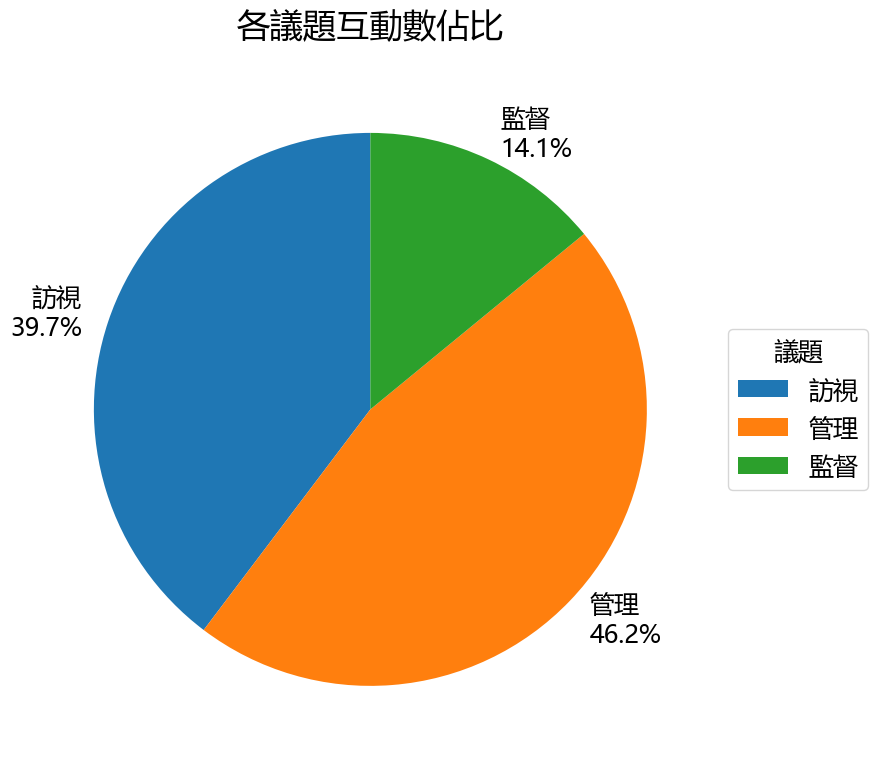

In [132]:
# 議題佔比圓餅圖
interactions = result2.loc['互動數']

# 計算佔比百分比
percentages = (interactions / interactions.sum()) * 100

# 創建圓餅圖
plt.figure(figsize=(10, 8))
plt.pie(percentages, 
        labels=[f'{label}\n{value:.1f}%' for label, value in percentages.items()],
        autopct='',
        startangle=90)

# 添加標題
plt.title('各議題互動數佔比', pad=20, size=24)

# 添加圖例
plt.legend(interactions.index, title="議題", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 調整布局
plt.tight_layout()

# 顯示圖表
plt.show()